# Object Detection with saved YOLOv3.h5

In [12]:
import yolo3_one_file_to_detect_them_all as yolo3
import numpy as np
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

In [13]:
model = load_model('yolov3.h5')

In [3]:
# load and prepare an image (function)
def load_image_pixels(filename, input_shape):
    # load the image as numpy array
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=input_shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height

In [4]:
def get_prediction(image, model, class_threshold, nms_threshold, anchors, net_h, net_w, image_h, image_w):
    yhat = model.predict(image)
    # extract boxes from yhat
    boxes = list()
    for i in range(len(yhat)):
        boxes += yolo3.decode_netout(yhat[i][0], anchors[i], class_threshold, nms_threshold, net_h, net_w)
    # correct the sizes of the bounding boxes
    yolo3.correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
    # suppress non-maximal boxes 
    yolo3.do_nms(boxes, nms_threshold)
    return boxes

In [5]:
# get all boxes details (function)
def get_boxes(boxes, labels, thresh):
    v_boxes, v_labels, v_scores = list(), list(), list()
    for box in boxes:
        for i in range(len(labels)):
            if box.classes[i] > thresh:
                v_boxes.append((box.xmin, box.ymin, box.xmax, box.ymax))
                v_labels.append(labels[i])
                v_scores.append(box.classes[i]*100)
    return v_boxes, v_labels, v_scores

In [6]:
# draw all boxes (function)
def draw_boxes(filename, v_boxes, v_labels, v_scores):
    # create figure
    fig = plt.figure(figsize=(10,10))
    # load the image as numpy array
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for i in range(len(v_boxes)):
        box = v_boxes[i]
        # get coordinates
        x1, y1, x2, y2 = box
        width, height = x2 - x1, y2 - y1
        # create the rectangle
        rect = Rectangle((x1, y1), width, height, fill=False, color='white')
        # draw the box
        ax.add_patch(rect)
        # add text and score
        label = "%s (%.3f)" % (v_labels[i], v_scores[i])
        plt.text(x1, y1, label, color='white', fontsize='x-large')
    plt.axis('off')
    plt.show()

In [7]:
# yolov3 parameters
net_h, net_w = 416, 416
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

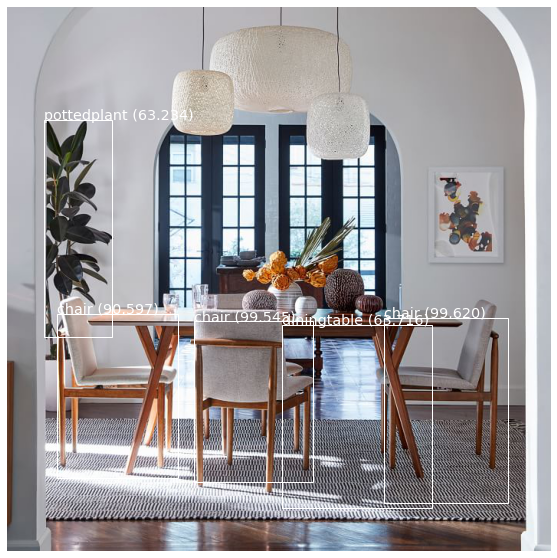

In [8]:
# specify the parameters
filename = 'data/diningroom.jpg'
class_threshold = 0.6
nms_threshold = 0.5

image, image_w, image_h = load_image_pixels(filename, (net_w, net_h))
boxes = get_prediction(image, model, class_threshold, nms_threshold, anchors, net_h, net_w, image_h, image_w)
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
draw_boxes(filename, v_boxes, v_labels, v_scores)

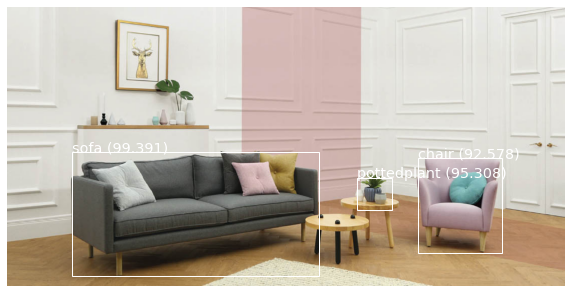

In [9]:
# specify the parameters
filename = 'data/livingroom.jpg'
class_threshold = 0.7
nms_threshold = 0.5

image, image_w, image_h = load_image_pixels(filename, (net_w, net_h))
boxes = get_prediction(image, model, class_threshold, nms_threshold, anchors, net_h, net_w, image_h, image_w)
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
draw_boxes(filename, v_boxes, v_labels, v_scores)

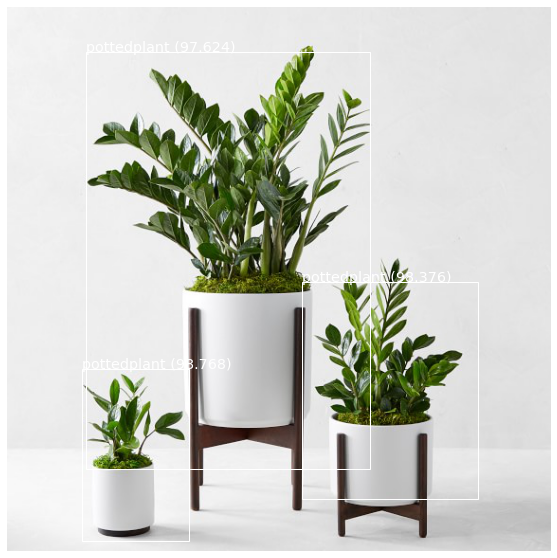

In [10]:
# specify the parameters
filename = 'data/plant2.jpg'
class_threshold = 0.6
nms_threshold = 0.5

image, image_w, image_h = load_image_pixels(filename, (net_w, net_h))
boxes = get_prediction(image, model, class_threshold, nms_threshold, anchors, net_h, net_w, image_h, image_w)
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
draw_boxes(filename, v_boxes, v_labels, v_scores)

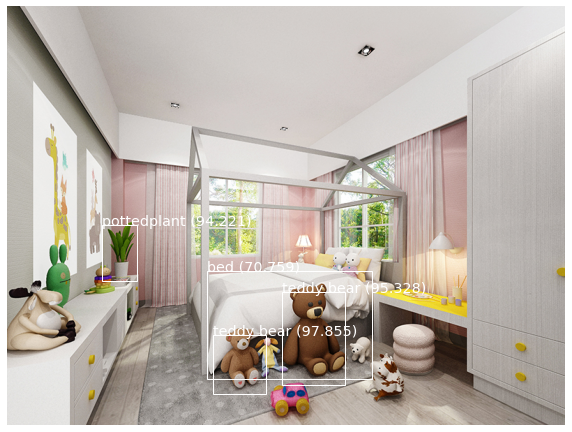

In [11]:
# specify the parameters
filename = 'data/kidroom.jpg'
class_threshold = 0.6
nms_threshold = 0.5

image, image_w, image_h = load_image_pixels(filename, (net_w, net_h))
boxes = get_prediction(image, model, class_threshold, nms_threshold, anchors, net_h, net_w, image_h, image_w)
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
draw_boxes(filename, v_boxes, v_labels, v_scores)